In [1]:
name = '2017-05-05-matplotlib-subplots'
title = 'More on subplots in matplotlib'
tags = 'matplotlib'
author = 'Denis Sergeev'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML, Image

html = connect_notebook_to_post(name, title, tags, author)

Today we covered a very important part of `matplotlib` - how to create multiple subplots in one figure.

We touched upon the following topics:

 <p><div class="lev1 toc-item"><a href="#Matplotlib-Axes" data-toc-modified-id="Matplotlib-Axes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matplotlib Axes</a></div><div class="lev1 toc-item"><a href="#Matplotlib-subplots" data-toc-modified-id="Matplotlib-subplots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matplotlib subplots</a></div><div class="lev2 toc-item"><a href="#Simple-way:--plt.subplot()-/-plt.subplots()-/-fig.add_subplot()" data-toc-modified-id="Simple-way:--plt.subplot()-/-plt.subplots()-/-fig.add_subplot()-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple way:  <code>plt.subplot()</code> / <code>plt.subplots()</code> / <code>fig.add_subplot()</code></a></div><div class="lev2 toc-item"><a href="#More-sophisticated-way:-GridSpec" data-toc-modified-id="More-sophisticated-way:-GridSpec-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>More sophisticated way: <code>GridSpec</code></a></div><div class="lev2 toc-item"><a href="#GridSpec-with-Varying-Cell-Sizes" data-toc-modified-id="GridSpec-with-Varying-Cell-Sizes-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>GridSpec</code> with Varying Cell Sizes</a></div><div class="lev1 toc-item"><a href="#Manual-adjustment-for-complex-plots" data-toc-modified-id="Manual-adjustment-for-complex-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manual adjustment for complex plots</a></div><div class="lev1 toc-item"><a href="#AxesGrid-toolbox" data-toc-modified-id="AxesGrid-toolbox-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>AxesGrid toolbox</a></div><div class="lev2 toc-item"><a href="#AxesGrid" data-toc-modified-id="AxesGrid-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>AxesGrid</code></a></div><div class="lev2 toc-item"><a href="#Blending-it-with-cartopy-to-create-maps" data-toc-modified-id="Blending-it-with-cartopy-to-create-maps-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Blending it with cartopy to create maps</a></div><div class="lev2 toc-item"><a href="#AxesDivider" data-toc-modified-id="AxesDivider-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><code>AxesDivider</code></a></div><div class="lev2 toc-item"><a href="#Anchored-Artists" data-toc-modified-id="Anchored-Artists-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Anchored Artists</a></div><div class="lev1 toc-item"><a href="#Extra-question:-time-axis" data-toc-modified-id="Extra-question:-time-axis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extra question: time axis</a></div>

OK, let's import the essentials:

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Make the figure bigger by default and use non-white facecolor to see the edges:

In [5]:
plt.rcParams['figure.facecolor'] = '0.9'
plt.rcParams['figure.figsize'] = (9, 6)

## Matplotlib Axes

Axes are very similar to subplots but allow placement of plots at any location in the figure. So if we want to put a smaller plot inside a bigger one we do so with axes.

As an argument, `plt.axes()` takes a sequence **[Left, Bottom, Width, Height]**

In [6]:
txt_kw = dict(ha='left', va='center', size=16, alpha=.5)

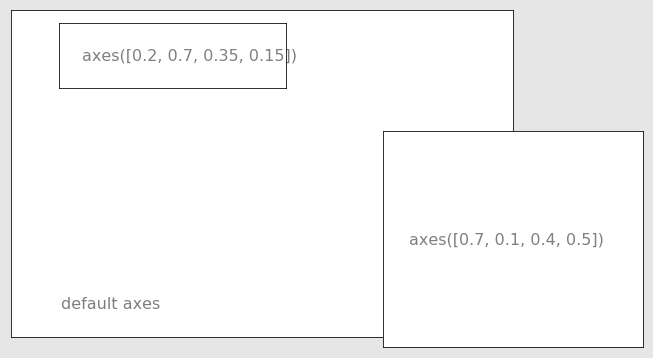

In [7]:
plt.axes()
plt.xticks([]), plt.yticks([])
plt.text(0.1, 0.1, 'default axes', **txt_kw)

plt.axes([0.2, 0.7, 0.35, 0.15])
plt.xticks([]), plt.yticks([])
plt.text(0.1, 0.5, 'axes([0.2, 0.7, 0.35, 0.15])', **txt_kw)

plt.axes([0.7, 0.1, 0.4, 0.5])
plt.xticks([]), plt.yticks([])
plt.text(0.1, 0.5, 'axes([0.7, 0.1, 0.4, 0.5])',**txt_kw)

## Matplotlib subplots

### Simple way:  `plt.subplot()` / `plt.subplots()` / `fig.add_subplot()`

The simplest way to create a subplot(s) is this:

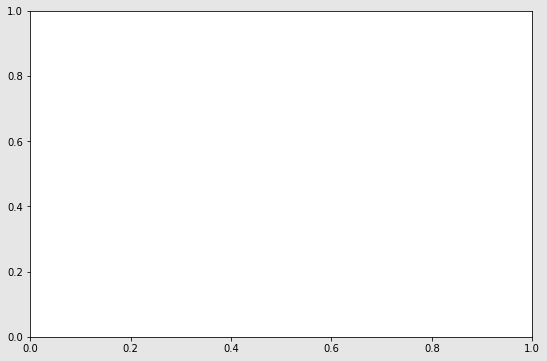

In [8]:
ax = plt.subplot()

To get a figure explicitly, you need a slightly different function:

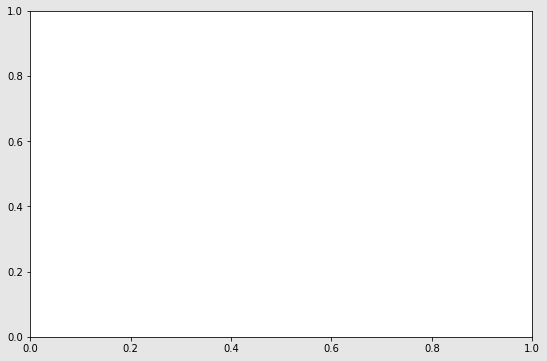

In [9]:
fig, ax = plt.subplots()

which is equivalent to the following two lines of code:

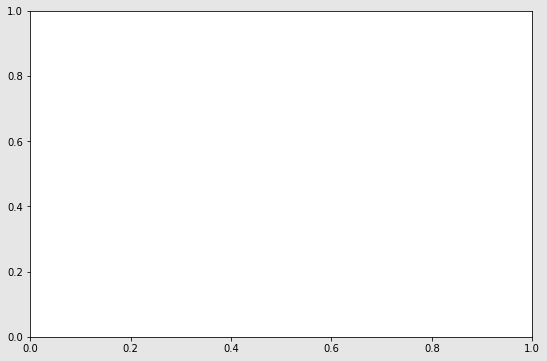

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

Of course, this function wouldn't be named `subplots` if it wasn't used for creating *multiple* subplots. You can create a grid of axes by using the special keyword arguments:

(<matplotlib.figure.Figure at 0x7fc1df22c710>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1df246f60>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7fc1df01bb00>]], dtype=object))

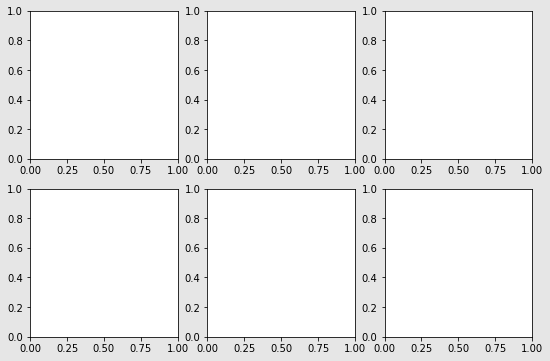

In [11]:
plt.subplots(ncols=3, nrows=2)  # , sharex=True

Note that it returns a tuple containing a `figure` object and a 2x3 `numpy` array of axes objects.

### More sophisticated way: `GridSpec`

In [12]:
from matplotlib.gridspec import GridSpec

For a more complex grid of plots, you can use `GridSpec`. A `GridSpec` instance provides array-like (2d or 1d) indexing that returns the `SubplotSpec` instance.
For a `SubplotSpec` that spans multiple cells, use slice.

Type of gs is <class 'matplotlib.gridspec.GridSpec'>


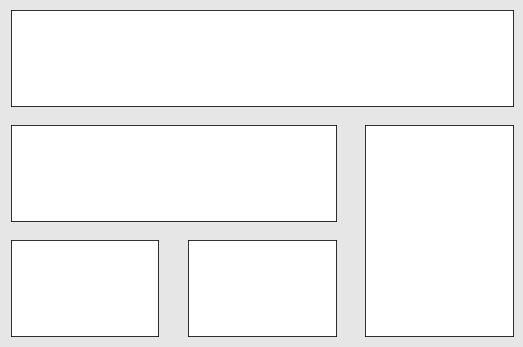

In [13]:
fig = plt.figure()

gs = GridSpec(3, 3)
print('Type of gs is {}'.format(type(gs)))

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,:-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1,0])
ax5 = fig.add_subplot(gs[-1,-2])

for ax in fig.axes:
    ax.set_xticks([])
    ax.set_yticks([])

When a `GridSpec` is explicitly used, you can adjust the layout parameters of subplots.

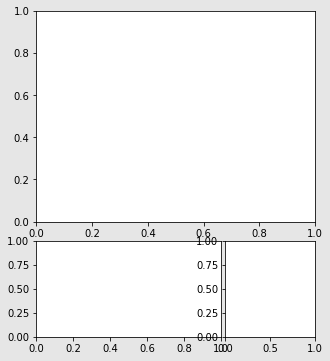

In [14]:
gs1 = GridSpec(3, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1, :-1])
ax3 = plt.subplot(gs1[-1, -1])

### `GridSpec` with Varying Cell Sizes

* By default, `GridSpec` creates cells of equal sizes. 
* You can adjust relative heights and widths of rows and columns.
* Note that absolute values are meaningless, only their relative ratios matter.

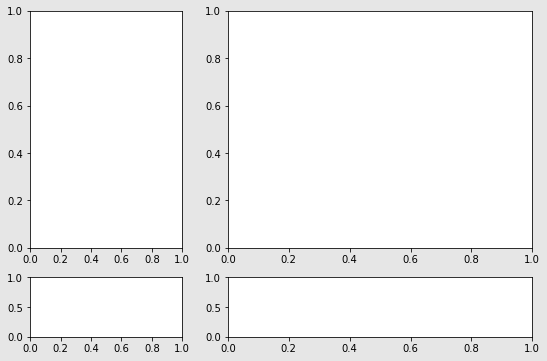

In [15]:
gs = GridSpec(2, 2,
              width_ratios=[1, 2],
              height_ratios=[4, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

## Manual adjustment for complex plots

Without relying on `subplots()` or `GridSpec`, you can use axes' `get_position` and `set_position` methods to get, modify and reset coordinates of the axes manually.

Example: https://gist.github.com/dennissergeev/b7da1bcf0a347caa8d42293131c0ef5d

## AxesGrid toolbox

Another useful matplotlib toolbox that allows you to create grids of subplots is `AxesGrid`. It is especially convenient if you need colorbars to be placed neatly beside main axes.

### `AxesGrid`

In [16]:
from mpl_toolkits.axes_grid1 import AxesGrid

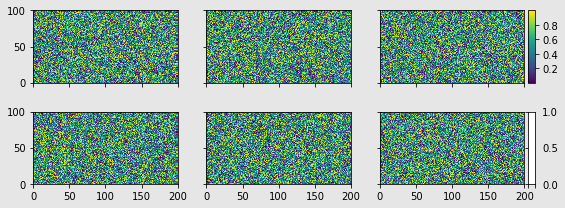

In [17]:
fig = plt.figure()

axgr = AxesGrid(fig, 111,
                cbar_mode="edge", 
                cbar_location="right",
                cbar_pad=0.05,
                nrows_ncols=(2, 3), axes_pad=0.4)

for ax in axgr.axes_all:
    h = ax.pcolormesh(np.random.rand(100,200))
    
fig.colorbar(h, cax=axgr.cbar_axes[0])
# fig.colorbar(h, cax=axgr.cbar_axes[1])

### Blending it with cartopy to create maps

By default, `AxesGrid` creates a grid of standard matplotlib axes. However, it has an `axes_class` keyword that allows you to change the type of axes (all at the same time).

An example of exploiting option can be found on cartopy's website: [AxesGrid example](http://scitools.org.uk/cartopy/docs/latest/examples/axes_grid_basic.html).

### `AxesDivider`

Yet another way of attaching extra subplots to existing axes is provided by `makes_axes_locatable()` function.

Note: does not work with cartopy (?)

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

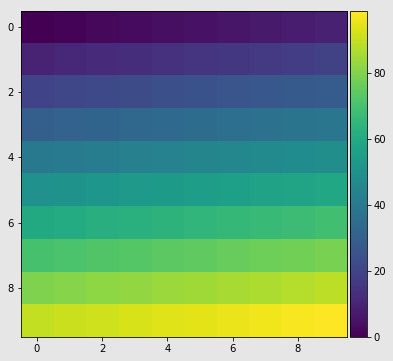

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(np.arange(100).reshape((10,10)))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

An even better use case of this function is provided on the [matplotlib website](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#scatter-hist-py-with-axesdivider).

### Anchored Artists

AxesGrid toolbox offers you a collection of anchored artists. It’s a collection of matplotlib artists whose location is *anchored* to the (axes) bounding box, like the legend.

In [20]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

For example, to create a fixed annotation in a corner of the plot we can use the following code:

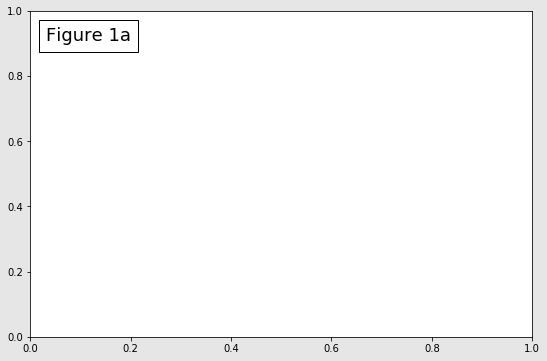

In [21]:
fig, ax = plt.subplots()

at = AnchoredText('Figure 1a',
                  loc=2, prop=dict(size=18), frameon=True)
ax.add_artist(at)

## panel-plots

If you are still struggling with subplots, try this little package: https://github.com/ajdawson/panel-plots

> A simple to use and understand system for making panel plots with `matplotlib`. The `panel-plots` package is designed to make it easy to create panel plots with specific sizes, either panel size or overall figure size, making it particularly suitable for generating figures for journal articles where you need to prepare an image of a particular size and ensure consistent and correct font sizing.

## Extra question: time axis

There was an extra question from the group, on how to deal with time axis in matplotlib: how to change the tick frequency, the label format, etc.

In [22]:
import datetime
import matplotlib.dates as mdates

In [23]:
x = [datetime.datetime.now() + datetime.timedelta(hours=i)
     for i in range(5)]

y = np.random.rand(len(x))

In [24]:
x

[datetime.datetime(2017, 5, 5, 17, 2, 31, 129633),
 datetime.datetime(2017, 5, 5, 18, 2, 31, 129662),
 datetime.datetime(2017, 5, 5, 19, 2, 31, 129671),
 datetime.datetime(2017, 5, 5, 20, 2, 31, 129676),
 datetime.datetime(2017, 5, 5, 21, 2, 31, 129683)]

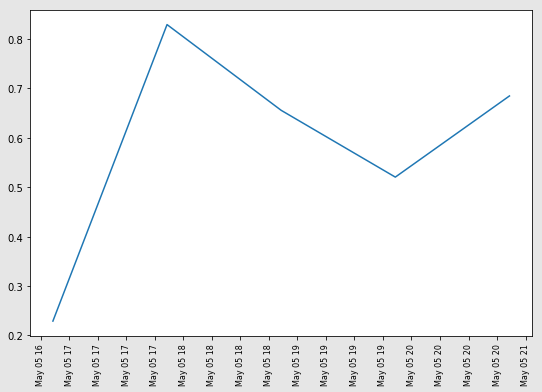

In [25]:
fig, ax = plt.subplots()

ax.plot(x, y)

min_loc = mdates.MinuteLocator(interval=15)
ax.xaxis.set_major_locator(min_loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %d %H'))

labels = ax.get_xticklabels()
_ = plt.setp(labels, rotation=90, fontsize=8)

## References
* [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html)
* [Customizing Location of Subplot Using GridSpec](https://matplotlib.org/users/gridspec.html)
* [Overview of AxesGrid toolkit](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html)

In [26]:
HTML(html)